<a href="https://colab.research.google.com/github/ShashankKamath/DecisionTree_ML/blob/master/DT_q3_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn import svm

Saving hw2_question3.csv to hw2_question3.csv


In [2]:
data = pd.read_csv("hw2_question3.csv")
# header=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,50]
# header2=[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]
header=[1,3,5,6,7,8,10,13,15,16,17,18,19,21,24,27,29,30,31,32,33,34,35,36,37,39,41,42,44,46,50]
header2=[2,4,9,11,12,14,20,22,23,25,26,28,38,40,43,45]

data.columns=header
for i in header2:
    data.insert(i,i,0)

data.head()

,1,3,2,5,4,6,7,8,10,9,...,39,38,41,40,42,44,43,46,45,50
0,1,1,0,1,0,1,1,-1,0,0,...,0,0,-1,0,1,1,0,1,0,-1
1,1,0,0,1,0,1,1,-1,-1,0,...,1,0,-1,0,1,0,0,-1,0,-1
2,1,0,0,1,0,1,1,-1,-1,0,...,1,0,-1,0,1,-1,0,1,0,-1
3,1,0,0,-1,0,1,1,-1,1,0,...,0,0,-1,0,1,1,0,1,0,1
4,-1,0,0,-1,0,1,-1,-1,1,0,...,1,0,-1,0,1,-1,0,-1,0,1


In [0]:
f_columns=[3,10,13,21,24,27,39,44]
for index,row in data.iterrows():
  for c_no in f_columns:
    if row[c_no]==-1:
      row[c_no-1]=1
      row[c_no]=0
      row[c_no+1]=0
    elif row[c_no]==0:
      row[c_no-1]=0
      row[c_no]=1
      row[c_no+1]=0    
    elif row[c_no]==1:
      row[c_no-1]=0
      row[c_no]=0
      row[c_no+1]=1    

In [0]:
import random
dataset=data.values.tolist()
random.shuffle(dataset)
train_set=dataset[:7369]
test_set=dataset[7370:]

In [0]:
train_array=np.array(train_set)
train_array_X = train_array[:,:-1]
train_array_Y =train_array[:,-1]
test_array=np.array(test_set)
test_array_X=test_array[:,:-1]
test_array_Y=test_array[:,-1]

In [0]:
from random import seed
from random import randrange
def cv_split(data, folds=3):
	data_split = list()
	data_copy = list(data)
	fold_size = int(len(data) / folds)
	for i in range(folds):
		fld = list()
		while len(fld) < fold_size:
			index = randrange(len(data_copy))
			fld.append(data_copy.pop(index))
		data_split.append(fld)
	return data_split

In [0]:
import time
import operator
num_of_simulations=1

c_list=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
c_list=list(np.arange(0.1,10,0.01))
total_accuracy=[]

total_time=[]

for c in range(len(c_list)):
  model = svm.SVC(C=c_list[c],kernel='linear')
#   print("C: ",c_list[c])
  total_accuracy.append(0)
  total_time.append(0)
  accuracy=[]
  running_time=[]
  for i in range(0,num_of_simulations):
#     print("Simulation No: ", i)
    seed(i)
    folds = cv_split(train_set, 3)
    for x in range(len(folds)):

        CVtest_set = folds[x]
        CVtrain_set = []
        for y in range(len(folds)):
          if y != x:
            CVtrain_set.extend(folds[y])

    CVtrain_array=np.array(CVtrain_set)
    CVtrain_array_X = CVtrain_array[:,:-1]
    CVtrain_array_Y =CVtrain_array[:,-1]

    CVtest_array=np.array(CVtest_set)
    CVtest_array_X=CVtest_array[:,:-1]
    CVtest_array_Y=CVtest_array[:,-1]
    
    start_time=time.time()
    model.fit(CVtrain_array_X,CVtrain_array_Y)
    stop_time=time.time()
    running_time.append(stop_time-start_time)
    
    class_predicted=[]
    class_predicted=model.predict(CVtest_array_X)
    score=0
    for j in range(0,len(CVtest_array_Y)):
      if CVtest_array_Y[j]==class_predicted[j]:
        score+=1
    accuracy.append(score/len(class_predicted))
    
#     print("Accuracy: ", accuracy)
  total_time[c]=sum(running_time)/len(running_time)
  total_accuracy[c]=(sum(accuracy)/len(accuracy))*100

index, value = max(enumerate(total_accuracy), key=operator.itemgetter(1))  
c_best=c_list[index]


In [10]:
total_accuracy

[54.96742671009772,
 54.96742671009772,
 61.197068403908794,
 92.01954397394137,
 93.28175895765473,
 93.81107491856677,
 93.85179153094462,
 93.72964169381108,
 93.72964169381108,
 93.72964169381108]

C=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]

total_accuracy=[54.96742671009772,
 54.96742671009772,
 61.197068403908794,
 92.01954397394137,
 93.28175895765473,
 93.81107491856677,
 93.85179153094462,
 93.72964169381108,
 93.72964169381108,
 93.72964169381108]
 
 total_time=[1.4534668922424316,
 1.486032247543335,
 1.5077414512634277,
 0.8267166614532471,
 0.38904738426208496,
 0.2931244373321533,
 0.39070868492126465,
 1.3111176490783691,
 6.843998193740845,
 65.05490708351135]

In [11]:
total_time

[1.4534668922424316,
 1.486032247543335,
 1.5077414512634277,
 0.8267166614532471,
 0.38904738426208496,
 0.2931244373321533,
 0.39070868492126465,
 1.3111176490783691,
 6.843998193740845,
 65.05490708351135]

Using the Best C on Test Data

In [44]:
max_index=[i for i, x in enumerate(total_accuracy) if x == max(total_accuracy)]
max_accuracy=0
for index in range(len(max_index)):
  c_best=c_list[max_index[index]]
  model = svm.SVC(C=c_best,kernel='linear')
  model.fit(train_array_X,train_array_Y)
  y_predict=model.predict(test_array_X)
  score=0
  for i in range(0,len(test_array_Y)):
    if test_array_Y[i]==y_predict[i]:
      score+=1
  accuracy=(score/len(y_predict))*100
  if accuracy>=max_accuracy:
    max_accuracy=accuracy
    c=c_best
print("Accuracy: ", max_accuracy)
print("C:", c)

Accuracy:  94.10966340933767
C: 1.6299999999999992


For Non-Linear Functions:


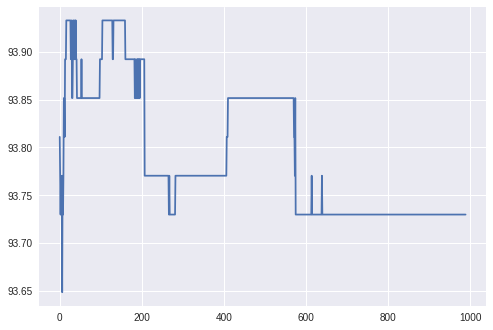

In [36]:
import matplotlib.pyplot as plt
plt.plot(total_accuracy)
plt.show()

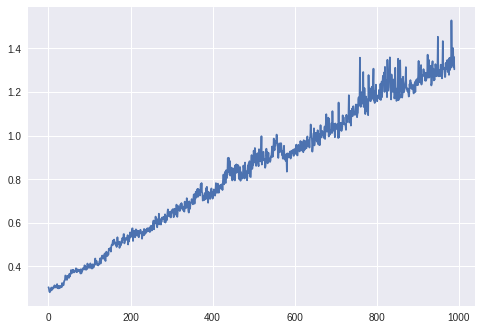

In [37]:
plt.plot(total_time)
plt.show()